In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [31]:
df = sns.load_dataset('titanic')

## Titanic dataset

In [32]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


**For each of the columns in the dataset, provide the following information:**
### data type

**Why do you think there redundant columns?**

In [41]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [39]:
df.select_dtypes([float])

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### for numeric columns:
* min and max values
* mean
* median
* standard deviation

In [43]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.age.count()

714

In [50]:
df.age.size

891

### for non-numeric columns:
* number of unique values
* top value by frequency
* frequency of top value

In [55]:
df.describe(include=['O', bool, 'category'])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


### plot the distribution of each column

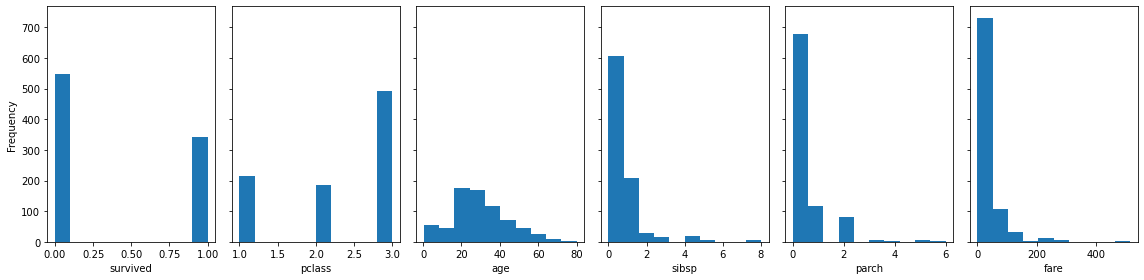

In [59]:
cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axs = plt.subplots(1, len(cols), figsize=(16, 4), sharey=True)

for col, ax_ in zip(cols, axs):
    df[col].plot(kind='hist', ax=ax_)
    ax_.set_xlabel(col)
    
fig.tight_layout()

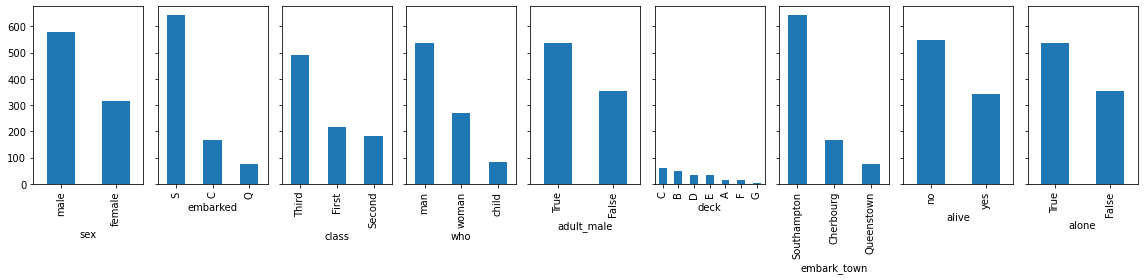

In [69]:
cols = df.select_dtypes(include=['object', 'category', bool]).columns

fig, axs = plt.subplots(1, len(cols), figsize=(16, 4), sharey=True)

for col, ax_ in zip(cols, axs):
    df[col].value_counts().plot(kind='bar', ax=ax_)
    ax_.set_xlabel(col)
    
fig.tight_layout()

### count the number NaN values per column

In [76]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
df.notna().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

### how do you transform the following:
*** make sure that the resulting datatype is consistent with the actual column.

1. `alive` to `survived`
2. `class` to `pclass`
3. `embark_town` to `embarked`

In [79]:
df.alive.value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [80]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
lambda x: 0 if x=='no' else 1

In [84]:
x = df.alive.apply(lambda x: 0 if x=='no' else 1)
x.equals(df.survived)

True

In [86]:
x = df.alive.map(lambda x: 0 if x=='no' else 1)
x.equals(df.survived)

True

In [90]:
x = df.alive.map({"no":0, "yes":1})
x.equals(df.survived)

True

In [92]:
df["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [93]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [109]:
df["class"].map({'First':1, 'Second':2, 'Third':3}).astype(np.int64)

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: class, Length: 891, dtype: int64

In [110]:
x = df["class"].map({'First':1, 'Second':2, 'Third':3}).astype(np.int64)
x.equals(df.pclass)

True

In [114]:
x = df["class"].apply(lambda x: ["First", "Second", "Third"].index(x)+1).astype(np.int64)
x.equals(df.pclass)

True

In [116]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [117]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [119]:
z = df.embark_town.apply(lambda x: x[0] if isinstance(x, str) else x)
z.equals(df.embarked)

True

In [ ]:
# you can also use map(dict) to handle nans

**Extra: groupby aggregate, transform**

In [124]:
df.sort_values(by='sex')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
383,1,1,female,35.0,1,0,52.0000,S,First,woman,False,NaN,Southampton,yes,False
218,1,1,female,32.0,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
609,1,1,female,40.0,0,0,153.4625,S,First,woman,False,C,Southampton,yes,True
216,1,3,female,27.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
215,1,1,female,31.0,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,3,male,18.0,1,0,6.4958,S,Third,man,True,NaN,Southampton,no,False
372,0,3,male,19.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
373,0,1,male,22.0,0,0,135.6333,C,First,man,True,NaN,Cherbourg,no,True
360,0,3,male,40.0,1,4,27.9000,S,Third,man,True,NaN,Southampton,no,False


In [132]:
df.sort_values(by='sex').groupby("sex")['age'].apply(lambda g: g.mean())

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [133]:
df.sort_values(by='sex').groupby("sex")['age'].aggregate(lambda g: g.mean())

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [126]:
df.sort_values(by='sex').groupby("sex")['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [127]:
df.sort_values(by='sex').groupby("sex")['age'].transform(np.mean)

383    27.915709
218    27.915709
609    27.915709
216    27.915709
215    27.915709
         ...    
371    30.726645
372    30.726645
373    30.726645
360    30.726645
890    30.726645
Name: age, Length: 891, dtype: float64

In [152]:
df.sort_values(by='sex').groupby("sex")[['age', 'parch']].agg({'age':np.mean, 'parch':max})

,age,parch
sex,,
female,27.915709,6
male,30.726645,5


In [139]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### create a function that recreates the column `who` from the columns `age` and `sex`

Apply the function to the appropriate columns then check if it returns the correct values.

In [154]:
df.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

### create a lambda function that recreates the column `alone` from the columns `sibsp` and `parch`
Apply the function to the appropriate columns then check if it returns the correct values.

### demographic description per embarkation town

Provide a demographic (age, sex, fare, number of travel companions) description per embarkation town.

Include the following:
1. distribution plots per property per group. (ex: age distribution for every town) 
2. mean and median values per property per group.

What can you infer about these towns based on your demographic observations?

### demographic description per survival status

Do the same demographic description per survival status. What are the characteristics of those who survived based on your observations?

## Student Dataset

Download the Student Performance Dataset from here: https://archive.ics.uci.edu/ml/datasets/Student+Performance

Please read student.txt for the data description.


In [172]:
# student unique identifiers:
identifiers = ["school","sex","age","address",
               "famsize","Pstatus",
               "Medu","Fedu",
               "Mjob","Fjob",
               "reason",
               "nursery","internet"]

grades = ['G1', 'G2', 'G3']

### open the two csv files and store them into separate dataframes

Get ONLY the columns in the list `identifiers` and `grades`.

In [113]:
!ls student

student-mat.csv student-merge.R student-por.csv student.txt


In [175]:
# df_mat = 
display(df_mat.head())
display(df_mat.shape)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,yes,no,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,no,yes,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,yes,yes,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,yes,yes,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,yes,no,6,10,10


(395, 16)

In [176]:
# df_por = 
display(df_por.head())
display(df_por.shape)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,yes,no,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,no,yes,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,yes,yes,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,yes,yes,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,yes,no,11,13,13


(649, 16)

### create a pivot table that gets the median value of `G1`, `G2`, and `G3`  per `famsize` and `sex`

Your dataframe should look like this:

<img src =./images/student_pivot1.png>

#### Transform the dataframe into this:
    
<img src= images/student_pivot_transform.png>

#### Flatten the dataframe like this:
<img src = images/flatten.png>

### merge the two dataframe using the students' identifiers 
* there are students enrolled in math but not in portugese and vice verse. make sure not to drop their information.
* distinguish the math and portugese grades using `_m` and `_p` suffixes respectively.

Questions:
* How many students are enrolled in both classes? - 382
* How many students are enrolled in only one class? - 300
* How may students are enrolled in only math? - 275
* How may students are enrolled in only portugese? - 25

In [184]:
# df_merged = 
df_merged.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,G1_p,G2_p,G3_p,G1_m,G2_m,G3_m
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,yes,no,0.0,11.0,11.0,5.0,6.0,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,no,yes,9.0,11.0,11.0,5.0,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,yes,yes,12.0,13.0,12.0,7.0,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,yes,yes,14.0,14.0,14.0,15.0,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,yes,no,11.0,13.0,13.0,6.0,10.0,10.0


### create a cross tab of `famsize` and `sex` that counts how many students belong to each category

<img src = images/student_crosstab.png>

#### convert this dataframe into percentage of total number of students per famsize

#### convert this dataframe into percentage of total number of students per sex

### create a crosstab of famsize and sex that shows the median G1 per category

<img src = images/student_crosstab_median.png>

### create a separate data frame with only math and portugese grades called df_grades.

In [257]:
# df_grades = 
df_grades.head()

,G1_p,G2_p,G3_p,G1_m,G2_m,G3_m
0,0.0,11.0,11.0,5.0,6.0,6.0
1,9.0,11.0,11.0,5.0,5.0,6.0
2,12.0,13.0,12.0,7.0,8.0,10.0
3,14.0,14.0,14.0,15.0,14.0,15.0
4,11.0,13.0,13.0,6.0,10.0,10.0


In [258]:
df_grades.shape

(682, 6)

### from df_grades, add two more columns that computes the average grade of a student for math and portugese

Limit the average grade to two decimal places.

In [259]:
# df_grades['math_ave'] = 

In [260]:
# df_grades['por_ave'] = 

In [261]:
df_grades.head()

,G1_p,G2_p,G3_p,G1_m,G2_m,G3_m,math_ave,por_ave
0,0.0,11.0,11.0,5.0,6.0,6.0,5.67,7.33
1,9.0,11.0,11.0,5.0,5.0,6.0,5.33,10.33
2,12.0,13.0,12.0,7.0,8.0,10.0,8.33,12.33
3,14.0,14.0,14.0,15.0,14.0,15.0,14.67,14.00
4,11.0,13.0,13.0,6.0,10.0,10.0,8.67,12.33


### compare the distribution and average math and portugese grades of students
#### with both stay at home parents vs those who only have one stay-at home parent

#### with both working parents vs those who only have one stay-at home parent

## Online Retail Dataset

Download the dataset here: https://archive.ics.uci.edu/ml/datasets/online+retail

In [286]:
df_retail = pd.read_excel('Online Retail.xlsx')
display(df_retail.head())
display(df_retail.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(541909, 8)

In [287]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [288]:
df_retail = df_retail.set_index('InvoiceDate')

In [289]:
df_retail['TotalPrice'] = df_retail['Quantity'].mul(df_retail['UnitPrice'])

### Plot the total sales
* per month
* per quarter
* per year


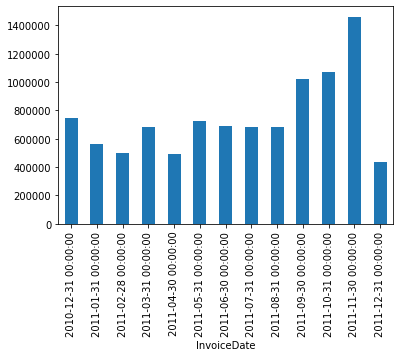

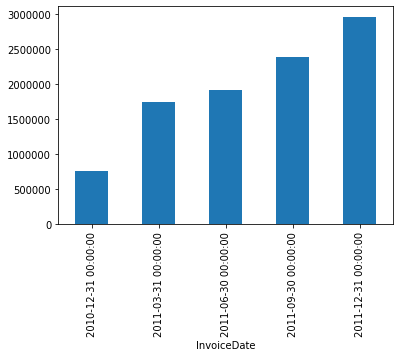

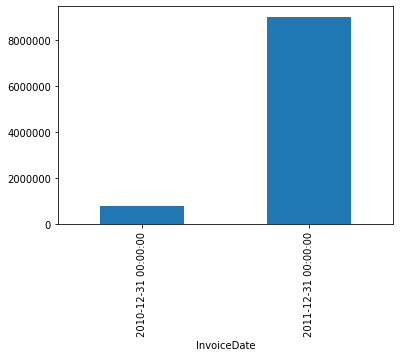